#**LetsGrowMore Data Science Internship (VIP)**

**Name: Akshata Khedekar**

**Title: Develop A Neural Network That Can Read Handwriting**

**Level: Advanced**

**Batch: March**

#**Step 1: Data Collection**

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


Reading dataset

In [2]:

train = pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#**Step 2: Understanding the Data**


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [7]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [8]:
X=train.drop(["label"],axis=1).values
Y=train["label"].values

#**Step 3: Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


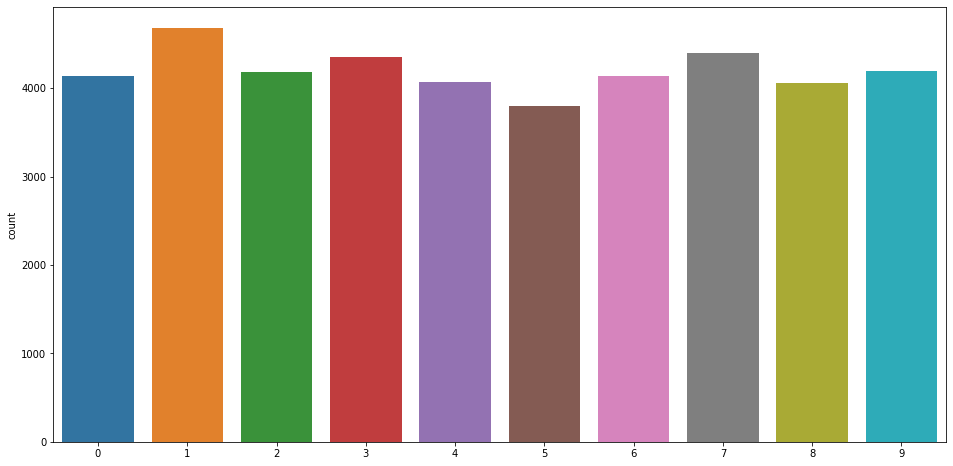

In [9]:
plt.figure(figsize=(16,8))
sns.countplot(Y)

Here we are displaying the input images

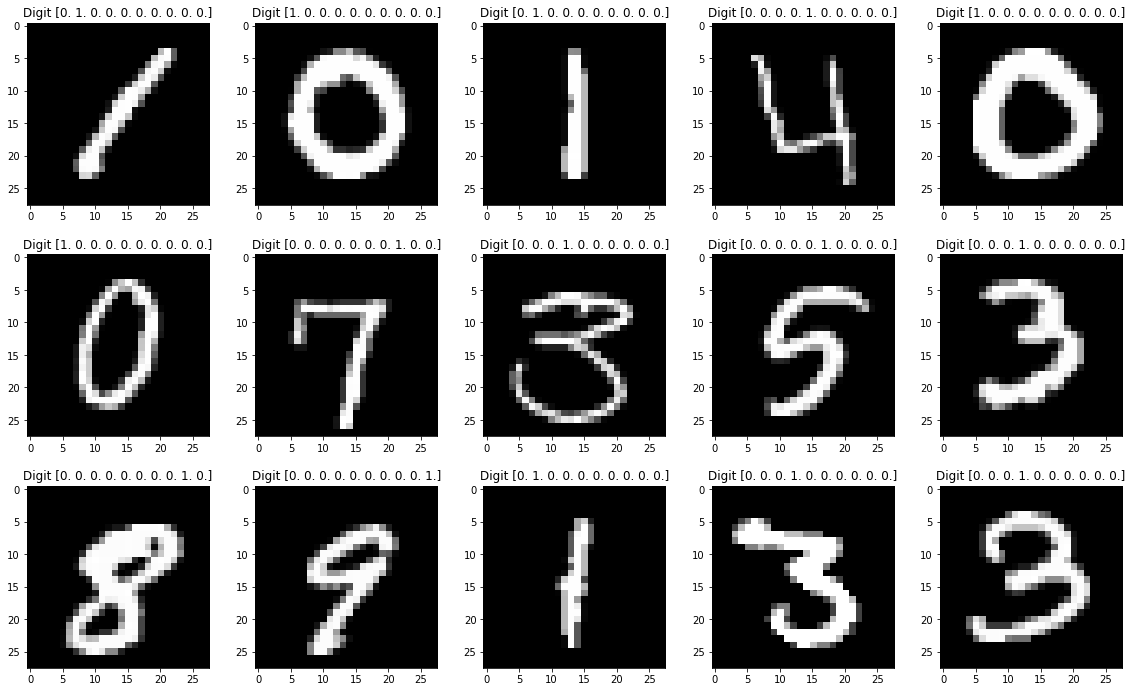

In [27]:
X_plot = X.values.reshape(-1, 28, 28)
def digits(mono = 'gray'):
    fig = plt.figure(figsize = (16, 16))
    for z in range(15):
        plt.subplot(5, 5,z+1)
        plt.imshow(X_plot[z], cmap = mono)
        plt.title("Digit {}".format(Y[z]))
        
    plt.tight_layout()
    
digits()

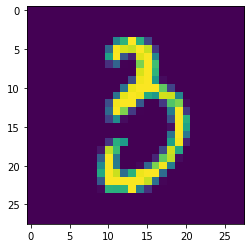

In [10]:
plt.imshow(X[150].reshape([28,28]))

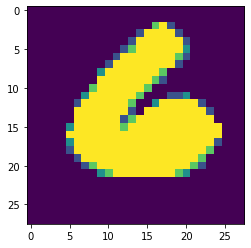

In [11]:
plt.imshow(X[500].reshape([28,28]))

# **Step 6: Data Transformation**

In [12]:

X= X.reshape([42000,28,28,1])
Y= Y.reshape([42000,1])

Here we are converting the input to categorical values where we have classes from 0-9

In [13]:
from keras.utils.np_utils import to_categorical
Y=to_categorical(Y,num_classes=10)

# **Step 7: Model Building**

To test how the model’s performance,this is usually done by splitting the labelled data we have collected into two parts with 80%-20%. One part of the data is used to build the machine learning model, and is called the training data (i.e. X_train and y_train). The rest of the 20% data will be used to test how well the model works; this is called the test data(i.e. X_test, y_test).


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=10,test_size=0.2)

Here we are creating aur network with sequential model with layers

Conv2D = This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.

MaxPooling2D = Max pooling layer for 2D inputs

Dropout = The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.



In [15]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [16]:

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])

In [17]:

history=model.fit(x_train,y_train,batch_size=256,epochs=20)

Epoch 1/20
148/148 [==============================] - 118s 778ms/step - loss: 0.4437 - binary_accuracy: 0.9018
Epoch 2/20
148/148 [==============================] - 109s 736ms/step - loss: 0.1191 - binary_accuracy: 0.9606
Epoch 3/20
148/148 [==============================] - 108s 729ms/step - loss: 0.0593 - binary_accuracy: 0.9823
Epoch 4/20
148/148 [==============================] - 114s 770ms/step - loss: 0.0409 - binary_accuracy: 0.9884
Epoch 5/20
148/148 [==============================] - 109s 733ms/step - loss: 0.0321 - binary_accuracy: 0.9911
Epoch 6/20
148/148 [==============================] - 108s 733ms/step - loss: 0.0275 - binary_accuracy: 0.9924
Epoch 7/20
148/148 [==============================] - 108s 731ms/step - loss: 0.0243 - binary_accuracy: 0.9931
Epoch 8/20
148/148 [==============================] - 108s 727ms/step - loss: 0.0208 - binary_accuracy: 0.9941
Epoch 9/20
148/148 [==============================] - 107s 726ms/step - loss: 0.0196 - binary_accuracy: 0.9946
E

The model summary table reports the strength of the relationship between the model and the dependent variable

In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

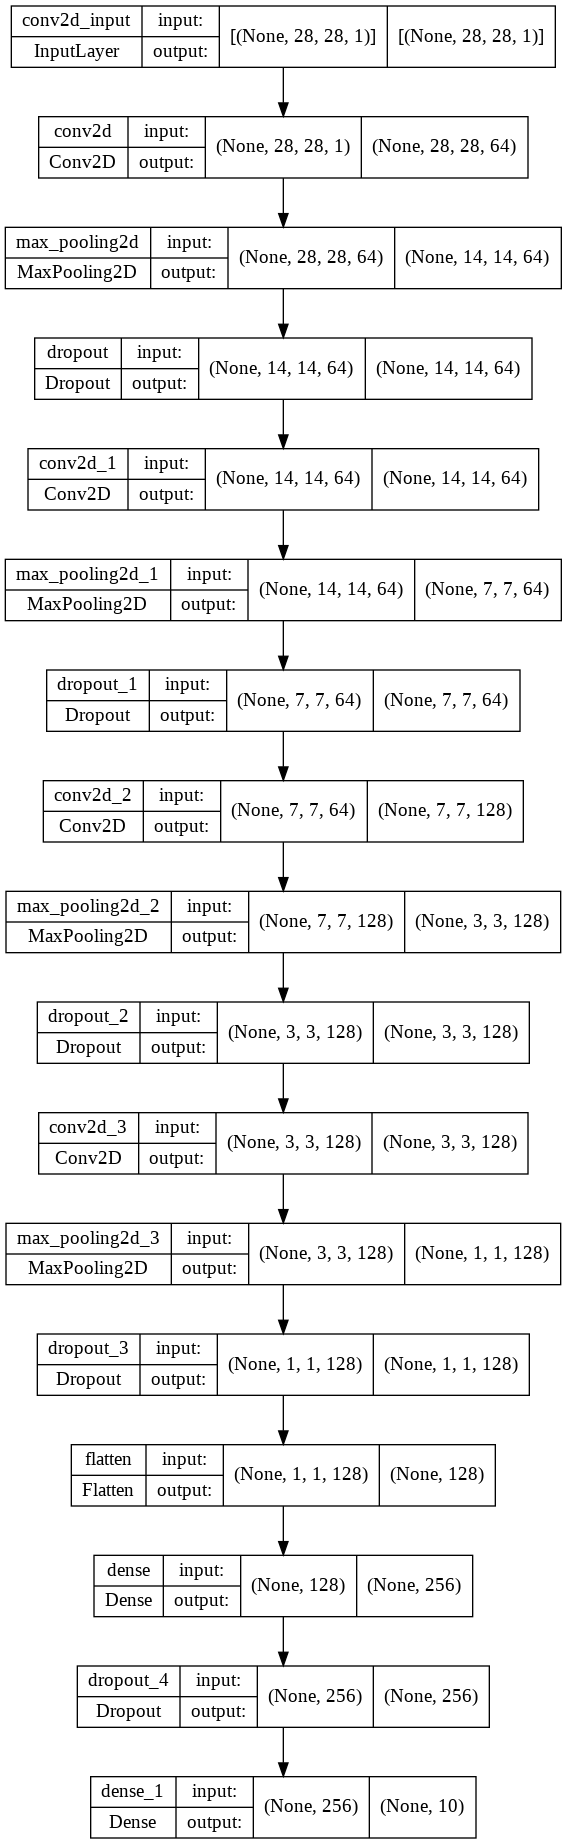

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

Prediction

In [20]:
y_pred=model.predict(x_test)
y_pred

array([[6.5817553e-20, 8.9151851e-14, 1.4594129e-12, ..., 1.0000000e+00,
        2.0922622e-17, 1.4274722e-12],
       [6.6558433e-25, 8.5039511e-20, 1.8861885e-18, ..., 5.1086618e-19,
        3.8895071e-18, 1.8704813e-19],
       [2.4576863e-13, 3.5996306e-13, 3.2999276e-12, ..., 2.1381241e-09,
        2.3054550e-10, 9.9999988e-01],
       ...,
       [6.1361470e-16, 1.2924757e-11, 2.2402517e-13, ..., 2.7429430e-11,
        6.3387923e-13, 6.1980382e-10],
       [1.0000000e+00, 2.2689823e-24, 5.3909225e-20, ..., 2.1769584e-20,
        4.1664537e-18, 2.1628579e-16],
       [5.3953460e-20, 1.5347346e-20, 8.4477011e-18, ..., 2.3661700e-19,
        1.0000000e+00, 7.2117987e-17]], dtype=float32)

Plotting the garph of loss data

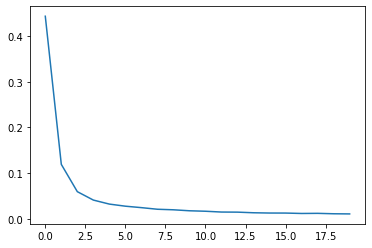

In [22]:

history_df=pd.DataFrame(history.history)
history_df['loss'].plot()

Model Evaluation

In [23]:

model.evaluate(x_test,y_test)

132/132 [==============================] - 3s 23ms/step - loss: 0.0051 - binary_accuracy: 0.9985


[0.0051083751022815704, 0.9985478520393372]

So we getting 99% of accuracy for our network that can read handwriting